<a href="https://colab.research.google.com/github/angelavilaventre/Metodos-Numericos/blob/main/Integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias y funciones

In [ ]:
import sympy
from sympy import *
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

x=Symbol('x')

def Interpolacion(puntos_x,puntos_y):
  Li=[]
  Pn=0

  for i in range(0,len(puntos_y)):
    k=1
    for j in range(0,len(puntos_x)):
      if i!=j:
        k=k*((x-puntos_x[j])/(puntos_x[i]-puntos_x[j]))
    Li.append(k)
    Pn+=puntos_y[i]*Li[i]

  return Pn

Integración por Punto Medio

In [ ]:
def PuntoMedio(f,a,b,n=2):
  '''
  f: función matemática,
  a: límite inferior,
  b: límite superior,
  n: número de intervalos intermedios
  '''
  if(n>1):
    resultado=0
    ci=[]
    yi=[]
    yreal=[]
    xi=linspace(a,b,n)
    xreal=linspace(a,b,n*100)
    c=(xi[1]-xi[0])/2
    for i in range(0,len(xreal)):
      yreal.append(f.evalf(subs={x:xreal[i]}))
    for i in range(0,len(xi)):
      yi.append(f.evalf(subs={x:xi[i]}))
      ci.append(f.evalf(subs={x:xi[i]+c}))
      if i>0:
        resultado+= f.evalf(subs={x:(xi[i-1]+xi[i])/2})*(xi[i]-xi[i-1])
   
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
    ax.plot(xreal,yreal,color='#4b0082', linewidth=3)
    ax.vlines(x = xi, ymin = np.zeros(n), ymax = yi,
          linewidth=3,linestyle=':',color='#2b30f1')
    for i in range(0,len(xi)-1):
      inicio_ = xi[i]
      fin_    = xi[i+1] -inicio_

      ax.add_patch(
        patches.Rectangle(
            (inicio_, 0),
            fin_,ci[i],
            #edgecolor = '#fb30f1',
            facecolor = '#fb30f1',
            alpha=0.3,
            fill=True
        ))

    plt.show()

  else:
    print("El valor n es muy bajo")
  return resultado

Integración por Trapecio

In [ ]:
def Trapecio(f,a,b,n=2):
  '''
  f: función matemática,
  a: límite inferior,
  b: límite superior,
  n: número de intervalos intermedios
  '''
  if(n>1):
    resultado=0
    yi=[]
    xi=linspace(a,b,n)
    for i in range(0,len(xi)):
      yi.append(f.evalf(subs={x:xi[i]}))
      if i>0:
        resultado+= (1/2)*(xi[i]-xi[i-1])*(f.evalf(subs={x:xi[i]}) + f.evalf(subs={x:xi[i-1]}))
  else:
    print("El valor n es muy bajo")
  return resultado

Integración por Simpson 1/3

In [ ]:
def Simpson1_3(f,a,b):
  '''
  f: función matemática,
  a: límite inferior,
  b: límite superior
  '''
  Pl=Interpolacion([a,(a+b)/2, b],[f.evalf(subs={x:a}), f.evalf(subs={x:(a+b)/2}), f.evalf(subs={x:b})])
  return (((b-a)/2)/3)*(Pl.evalf(subs={x:a}) + 4*Pl.evalf(subs={x:(a+b)/2}) + Pl.evalf(subs={x:b}))

Integración por Simpson 3/8

In [ ]:
def Simpson3_8(f,a,b):
  '''
  f: función matemática,
  a: límite inferior,
  b: límite superior
  '''
  yi=[]
  xi=linspace(a,b,4)
  for i in range(0,len(xi)):
    yi.append(f.evalf(subs={x:xi[i]}))
  Pl=Interpolacion(xi,yi)
  return (3/8)*((b-a)/3)*(Pl.evalf(subs={x:xi[0]}) + 3*(Pl.evalf(subs={x:xi[1]})+Pl.evalf(subs={x:xi[2]})) + Pl.evalf(subs={x:xi[3]}))

Ejercicios

1)$$\int _0^2x^2dx\:$$

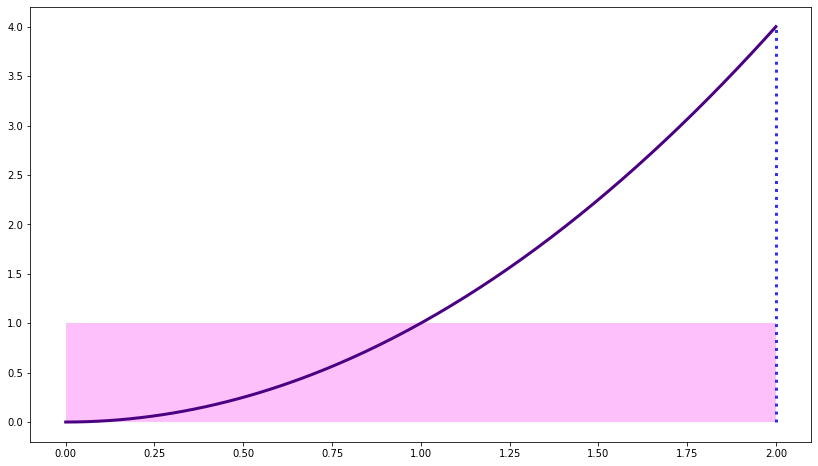

Punto Medio(n=2): 2.00000000000000
Trapecio (n=2): 4.00000000000000
Simpson 1/3: 2.66666666666667
Simpson 3/8: 2.66666666666667


In [ ]:
f1=x**2
a1=0
b1=2

print(f"Punto Medio(n=2): {PuntoMedio(f1,a1,b1)}")
print(f"Trapecio (n=2): {Trapecio(f1,a1,b1)}")
print(f"Simpson 1/3: {Simpson1_3(f1,a1,b1)}")
print(f"Simpson 3/8: {Simpson3_8(f1,a1,b1)}")

2) $$\int _0^2\frac{1}{x+1}dx\:$$

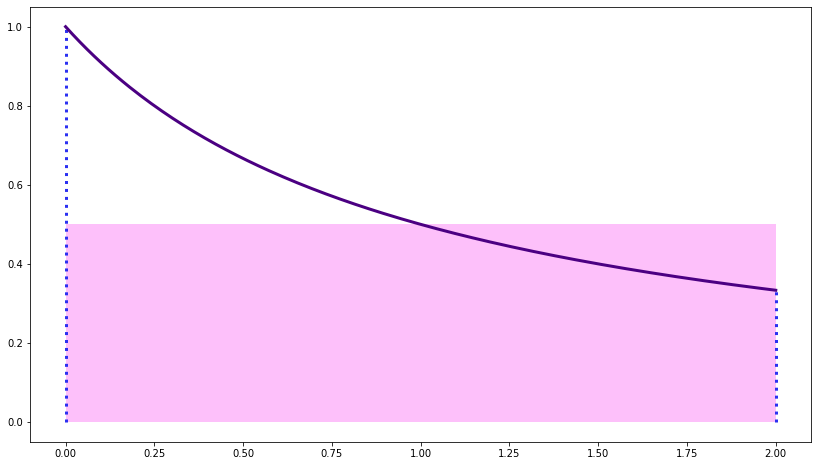

Punto Medio(n=2): 1.00000000000000
Trapecio (n=2): 1.33333333333333
Simpson 1/3: 1.11111111111111
Simpson 3/8: 1.10476190476190


In [ ]:
f2=1/(x+1)
a2=0
b2=2

print(f"Punto Medio(n=2): {PuntoMedio(f2,a2,b2)}")
print(f"Trapecio (n=2): {Trapecio(f2,a2,b2)}")
print(f"Simpson 1/3: {Simpson1_3(f2,a2,b2)}")
print(f"Simpson 3/8: {Simpson3_8(f2,a2,b2)}")

3) $$\int _0^1e^xdx\:$$

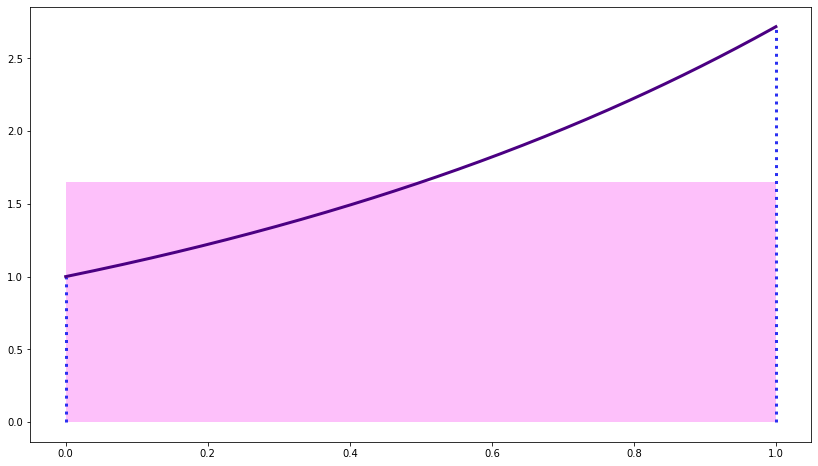

Punto Medio(n=2): 1.64872127070013
Trapecio (n=2): 1.85914091422952
Simpson 1/3: 1.71886115187659
Simpson 3/8: 1.71854015336017


In [ ]:
f3=sympy.exp(x)
a3=0
b3=1

print(f"Punto Medio(n=2): {PuntoMedio(f3,a3,b3)}")
print(f"Trapecio (n=2): {Trapecio(f3,a3,b3)}")
print(f"Simpson 1/3: {Simpson1_3(f3,a3,b3)}")
print(f"Simpson 3/8: {Simpson3_8(f3,a3,b3)}")

4) $$\int _1^2\frac{x^3}{1+x^{0.5}}dx\:$$

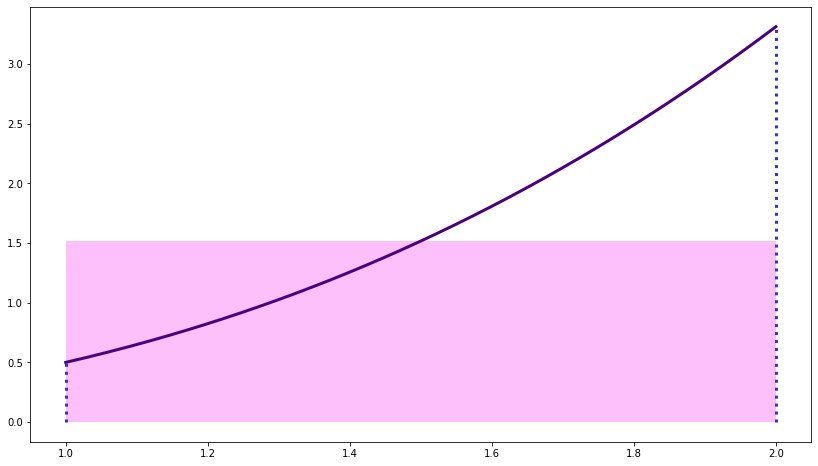

Punto Medio(n=2): 1.51702788189323
Trapecio (n=2): 1.90685424949238
Simpson 1/3: 1.64697000442628
Simpson 3/8: 1.64704637496726


In [ ]:
f4=(x**3)/(1+x**0.5)
a4=1
b4=2

print(f"Punto Medio(n=2): {PuntoMedio(f4,a4,b4)}")
print(f"Trapecio (n=2): {Trapecio(f4,a4,b4)}")
print(f"Simpson 1/3: {Simpson1_3(f4,a4,b4)}")
print(f"Simpson 3/8: {Simpson3_8(f4,a4,b4)}")